### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
y = boston.target

In [4]:
X = pd.DataFrame(data, columns=feature_names)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

t-sne

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [10]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

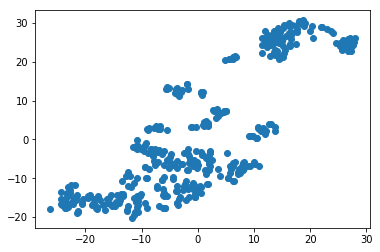

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [14]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [15]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(16, 17, 'Кластер 2')

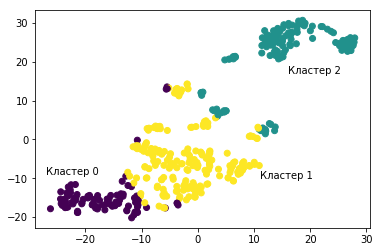

In [16]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -9, 'Кластер 0')
plt.text(11, -10, 'Кластер 1')
plt.text(16, 17, 'Кластер 2')

Price

In [17]:
y_train.mean()

22.796534653465343

In [18]:
y_train[labels_train==0].mean()

27.78837209302326

In [19]:
y_train[labels_train==1].mean()

16.165354330708663

In [20]:
y_train[labels_train==2].mean()

24.958115183246072

Text(0.5, 0, 'Цена')

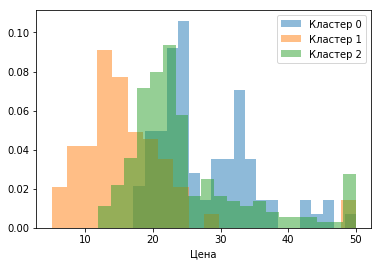

In [21]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

CRIM

In [22]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [23]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [24]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

Text(0.5, 0, 'Уровень преступности')

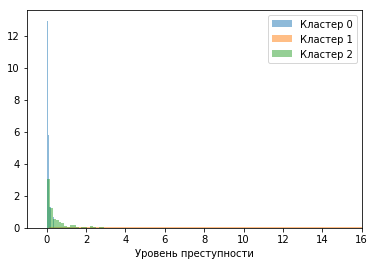

In [25]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(-1, 16)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Уровень преступности')

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_test_pred = lr.predict(X_test_scaled)

In [30]:
from sklearn.metrics import r2_score

In [31]:
# пераоначальный r2 без разделения на кластеры
r2_score(y_test, y_test_pred)

0.668759493535632

In [32]:
labels_test = kmeans.predict(X_test_scaled)

In [33]:
# 1я модель - на объектах из Кластера 0
lr.fit(X_train_scaled.loc[labels_train==0, :], 
       y_train[labels_train==0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])

r2_score(y_test[labels_test==0], y_test_pred_0), y_test_pred_0.size

(0.915516197205082, 16)

In [34]:
# 2я модель - на объектах из Кластера 1
lr.fit(X_train_scaled.loc[labels_train==1, :], 
       y_train[labels_train==1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])

r2_score(y_test[labels_test==1], y_test_pred_1), y_test_pred_1.size

(0.5231397590833383, 35)

In [35]:
# 3я модель - на объектах из Кластера 2
lr.fit(X_train_scaled.loc[labels_train==2, :], 
       y_train[labels_train==2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test==2, :])

r2_score(y_test[labels_test==2], y_test_pred_2), y_test_pred_2.size

(0.721524042313201, 51)

In [36]:
# Объединение известных правильных ответов по объектам из трёх кластеров
y_test_all = np.hstack([y_test[labels_test==0], 
                        y_test[labels_test==1],
                        y_test[labels_test==2]])
y_test_all.size

102

In [37]:
# Объединение предсказанных ответов по объектам из трёх кластеров
y_test_pred_all = np.hstack([y_test_pred_0, 
                             y_test_pred_1,
                             y_test_pred_2])
y_test_pred_all.size

102

In [38]:
# R2 по всем объектам тестовой выборки
r2_score(y_test_all, y_test_pred_all)

0.7955104919189295